In [26]:
import os
from scipy import ndimage
from skimage import exposure, filters
import subprocess
from nilearn.image import resample_to_img
import matplotlib as plt
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import shutil

La función `compare_sRMI_images` permite la visualización diseñada específicamente para el análisis comparativo de imágenes en formato NIfTI. Esta función permite comparar dos imágenes cerebrales lado a lado, mostrando las tres vistas ortogonales principales utilizadas en neuroimagen.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `nifti_path1` | `str` | Ruta al primer archivo NIfTI (.nii o .nii.gz) |
| `nifti_path2` | `str` | Ruta al segundo archivo NIfTI (.nii o .nii.gz) |
| `slice_index` | `int` | Índice del corte que se desea visualizar |
| `size1` | `tuple` | Tupla indicando el tamaño de la figura para la primera imagen (ancho, alto) |
| `size2` | `tuple` | Tupla indicando el tamaño de la figura para la segunda imagen (ancho, alto) |


```python
compare_sRMI_images(nifti_path1, nifti_path2, slice_index, size1=(10, 10), size2=(10, 10))
```

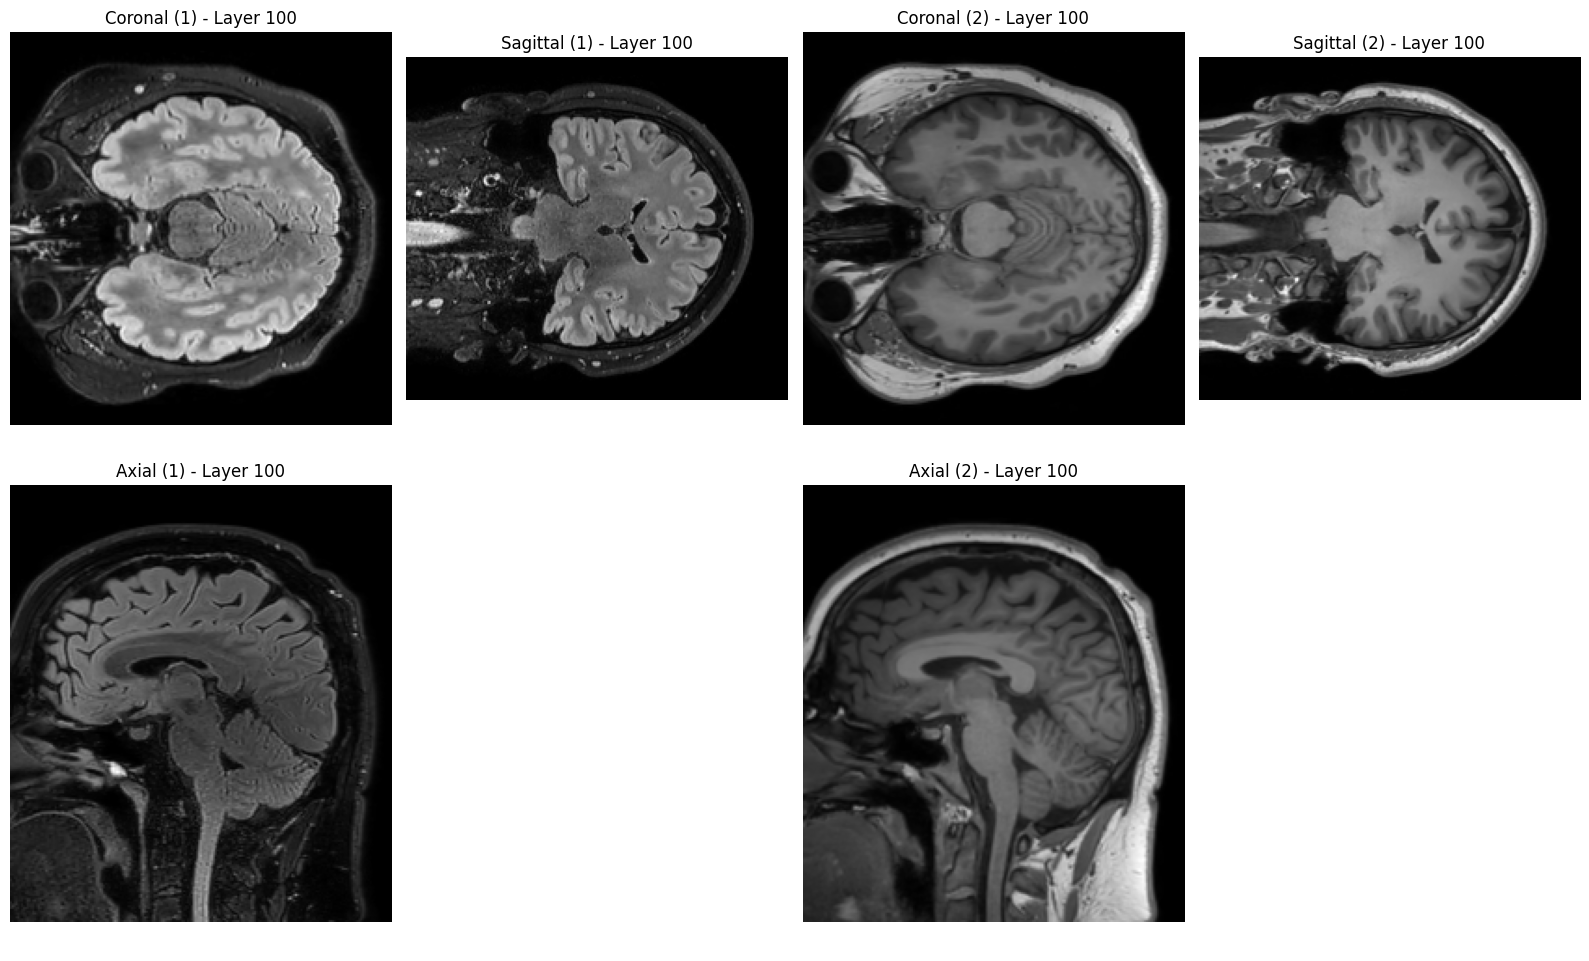

In [3]:
def compare_sRMI_images(nifti_path1, nifti_path2, slice_index, size1=(10, 10), size2=(10, 10)):
    """
    Loads two NIfTI images and shows three orthogonal slices: coronal (top), axial (bottom),
    and sagittal (right) for each image side by side.
    
    :param nifti_path1: Path to the first NIfTI file (.nii or .nii.gz).
    :param nifti_path2: Path to the second NIfTI file (.nii or .nii.gz).
    :param slice_index: Index of the slice you want to view.
    :param size1: Tuple indicating the size of the first image's figure.
    :param size2: Tuple indicating the size of the second image's figure.
    """
    # Load the NIfTI images
    img1 = nib.load(nifti_path1).get_fdata()
    img2 = nib.load(nifti_path2).get_fdata()
    
    # Validate slice_index
    min_index = min(img1.shape[0], img1.shape[1], img1.shape[2], img2.shape[0], img2.shape[1], img2.shape[2])
    if slice_index < 0 or slice_index >= min_index:
        print(f"Index out of range. It must be between 0 and {min_index - 1}.")
        return
    
    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(size1[0] + size2[0], max(size1[1], size2[1])))
    
    # First image slices
    axes[0, 0].imshow(img1[:, slice_index, :].T, cmap="gray", origin="lower")
    axes[0, 0].set_title(f"Coronal (1) - Layer {slice_index}")
    axes[0, 0].axis("off")
    
    axes[1, 0].imshow(img1[:, :, slice_index].T, cmap="gray", origin="lower")
    axes[1, 0].set_title(f"Axial (1) - Layer {slice_index}")
    axes[1, 0].axis("off")
    
    axes[0, 1].imshow(img1[slice_index, :, :].T, cmap="gray", origin="lower")
    axes[0, 1].set_title(f"Sagittal (1) - Layer {slice_index}")
    axes[0, 1].axis("off")
    
    axes[1, 1].axis("off")  # Empty
    
    # Second image slices
    axes[0, 2].imshow(img2[:, slice_index, :].T, cmap="gray", origin="lower")
    axes[0, 2].set_title(f"Coronal (2) - Layer {slice_index}")
    axes[0, 2].axis("off")
    
    axes[1, 2].imshow(img2[:, :, slice_index].T, cmap="gray", origin="lower")
    axes[1, 2].set_title(f"Axial (2) - Layer {slice_index}")
    axes[1, 2].axis("off")
    
    axes[0, 3].imshow(img2[slice_index, :, :].T, cmap="gray", origin="lower")
    axes[0, 3].set_title(f"Sagittal (2) - Layer {slice_index}")
    axes[0, 3].axis("off")
    
    axes[1, 3].axis("off")  # Empty
    
    plt.tight_layout()
    plt.show()

# Example usage
nifti_path1 = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point1/data/bids/sub-001/anat/sub-001_acq-FLAIRSAG3D_FLAIR.nii.gz')
nifti_path2 = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point1/data/bids/sub-001/anat/sub-001_acq-SAG3DT1ACCELERATED_T1w.nii.gz')
slice_index = 100
compare_sRMI_images(nifti_path1, nifti_path2, slice_index, size1=(10, 10), size2=(6, 8))


# normalize_image

La función `normalize_image` permite normalizar la intensidad de las imágenes en formato NIfTI, escalando los valores de píxel a un rango estándar de 0 a 1. Esta normalización es un paso fundamental en el preprocesamiento de neuroimágenes que estandariza los valores de intensidad entre diferentes adquisiciones y facilita el procesamiento posterior.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `image_path` | `str` | Ruta al archivo NIfTI original (.nii o .nii.gz) que se desea normalizar |
| `output_path` | `str` | Ruta donde se guardará la imagen normalizada (.nii o .nii.gz) |

## Descripción

La función realiza las siguientes operaciones:

1. **Carga de imagen**: Lee el archivo NIfTI especificado utilizando nibabel
2. **Extracción de datos**: Obtiene los datos de la imagen en formato de array numpy
3. **Normalización de intensidad**: Reescala las intensidades usando `skimage.exposure.rescale_intensity` al rango [0, 1]
4. **Creación de imagen normalizada**: Genera una nueva imagen NIfTI con los datos normalizados
5. **Guardado**: Almacena la imagen normalizada en la ruta de salida especificada

## Principio de normalización

La **normalización de intensidad** transforma linealmente los valores de píxel de la imagen original para que se ajusten al rango [0, 1]:

- **Valor mínimo original** → **0**
- **Valor máximo original** → **1**
- **Valores intermedios** → **Escalados proporcionalmente**

Esta transformación preserva las relaciones relativas entre diferentes intensidades mientras estandariza el rango dinámico.

## Notas importantes

- **Primer paso recomendado**: Debe aplicarse antes que otros filtros para garantizar consistencia
- **Preservación de metadatos**: La función mantiene los metadatos originales de la imagen NIfTI
- **Rango de salida fijo**: Siempre produce valores entre 0 y 1
- **Interpretación de valores**: Los valores normalizados pierden las unidades originales (ej. Hounsfield Units)
- **Visualización**: Se recomienda usar `compare_sRMI_images` para verificar que la normalización preserva las características anatómicas

## Aplicaciones típicas

- **Preprocesamiento estándar**: Base para cualquier pipeline de análisis de neuroimágenes
- **Preparación para machine learning**: Los modelos de ML requieren datos normalizados
- **Análisis multi-sujeto**: Estandarización para estudios de grupo
- **Comparación temporal**: Normalización para estudios longitudinales
- **Integración de modalidades**: Preparación para fusión de diferentes tipos de imagen

## Consideraciones importantes

- **Pérdida de información cuantitativa**: Los valores absolutos originales se pierden
- **Sensibilidad a outliers**: Valores extremos pueden afectar toda la normalización
- **Preservación de patología**: Las lesiones mantienen su contraste relativo


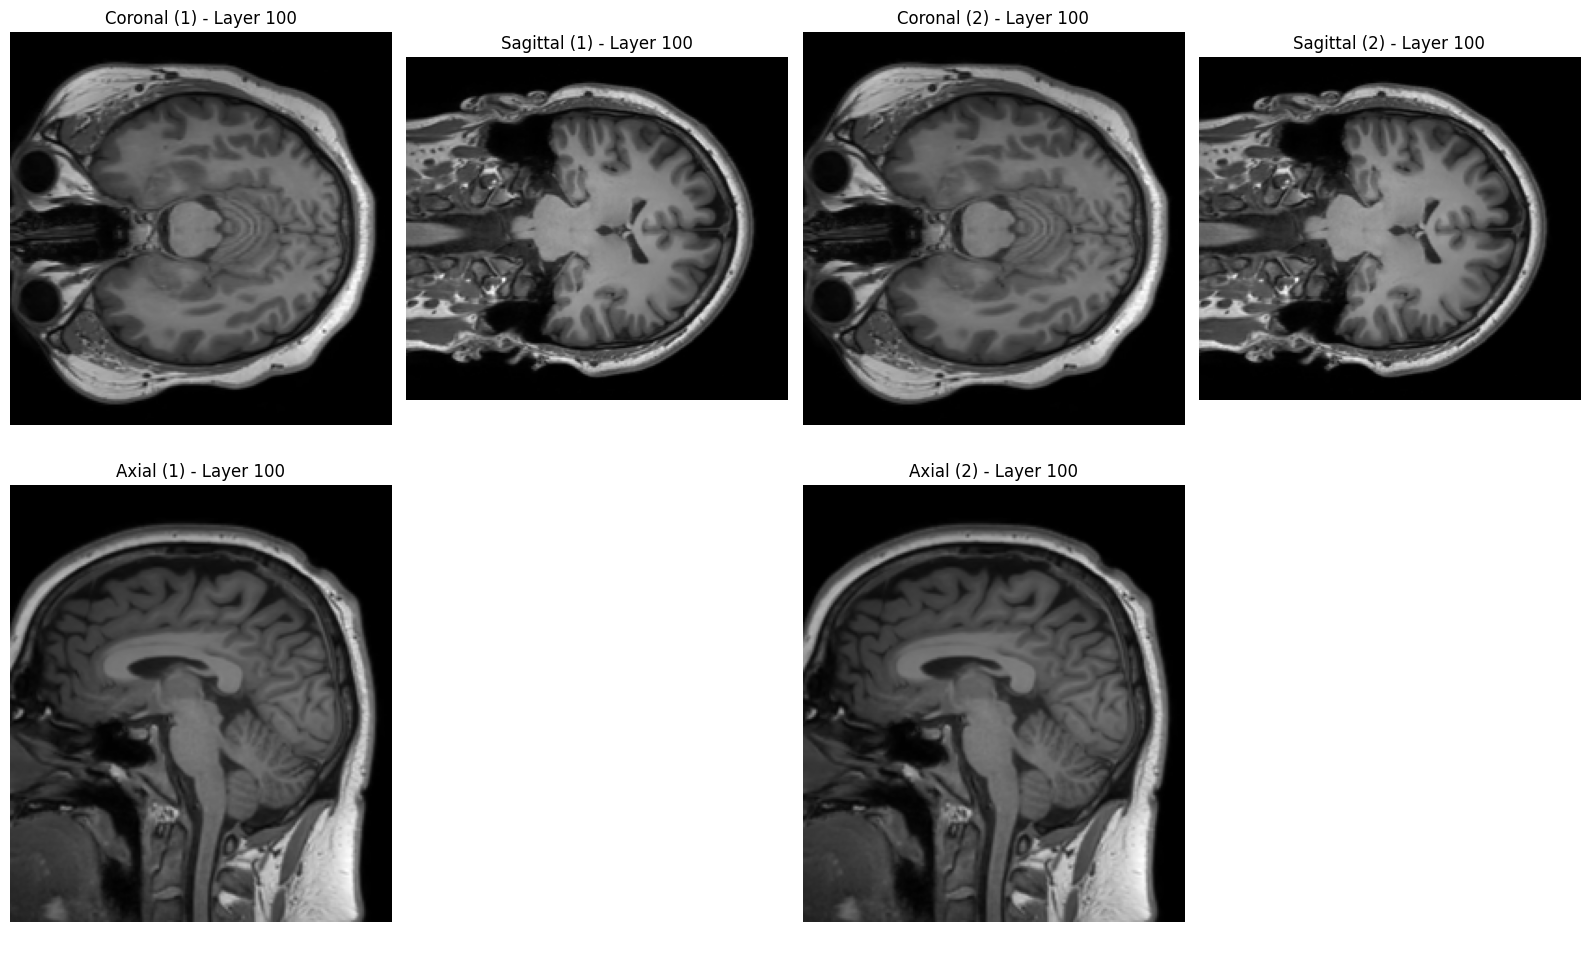

In [4]:
def normalize_image(image_path, output_path):
    """
    Loads a NIfTI image, normalizes its intensity, saves the normalized image, and displays slices of the original and normalized images.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to be normalized.
    - output_path : str
        Path to save the normalized image.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Normalize the image intensity
    normalized_data = exposure.rescale_intensity(image_data, out_range=(0, 1))
    
    # Create a new NIfTI object with the normalized data
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    
    # Save the normalized image
    nib.save(normalized_img, output_path)
    
# Define the file paths
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids/sub-001/anat/sub-001_acq-SAG3DT1ACCELERATED_T1w.nii.gz')
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/normalizado.nii.gz')

# Call the function to normalize, save, and visualize the image
normalize_image(image_path, output_path)
slice_index = 100           # Index of the slice to display
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))

# median_filter_image

La función `median_filter_image` permite aplicar un filtro de mediana a imágenes en formato NIfTI para reducir el ruido mientras preserva los bordes y estructuras importantes. Esta función carga una imagen cerebral, aplica el filtro de mediana especificado y guarda la imagen filtrada en la ubicación deseada.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `image_path` | `str` | Ruta al archivo NIfTI original (.nii o .nii.gz) que se desea filtrar |
| `output_path` | `str` | Ruta donde se guardará la imagen filtrada (.nii o .nii.gz) |
| `size` | `int`, opcional | Tamaño del filtro de mediana. Valor por defecto es 1 |

## Descripción

La función realiza las siguientes operaciones:

1. **Carga de imagen**: Lee el archivo NIfTI especificado utilizando nibabel
2. **Extracción de datos**: Obtiene los datos de la imagen en formato de array numpy
3. **Aplicación del filtro**: Aplica un filtro de mediana usando `scipy.ndimage.median_filter`
4. **Creación de imagen filtrada**: Genera una nueva imagen NIfTI con los datos procesados
5. **Guardado**: Almacena la imagen filtrada en la ruta de salida especificada

## Notas importantes

- **Tipo de ruido**: El filtro de mediana es especialmente efectivo para eliminar ruido tipo "sal y pimienta" en imágenes médicas
- **Tamaño del filtro**: 
  - `size=1`: Filtro mínimo, preserva mejor los detalles
  - Valores más altos: Mayor suavizado pero posible pérdida de detalles finos


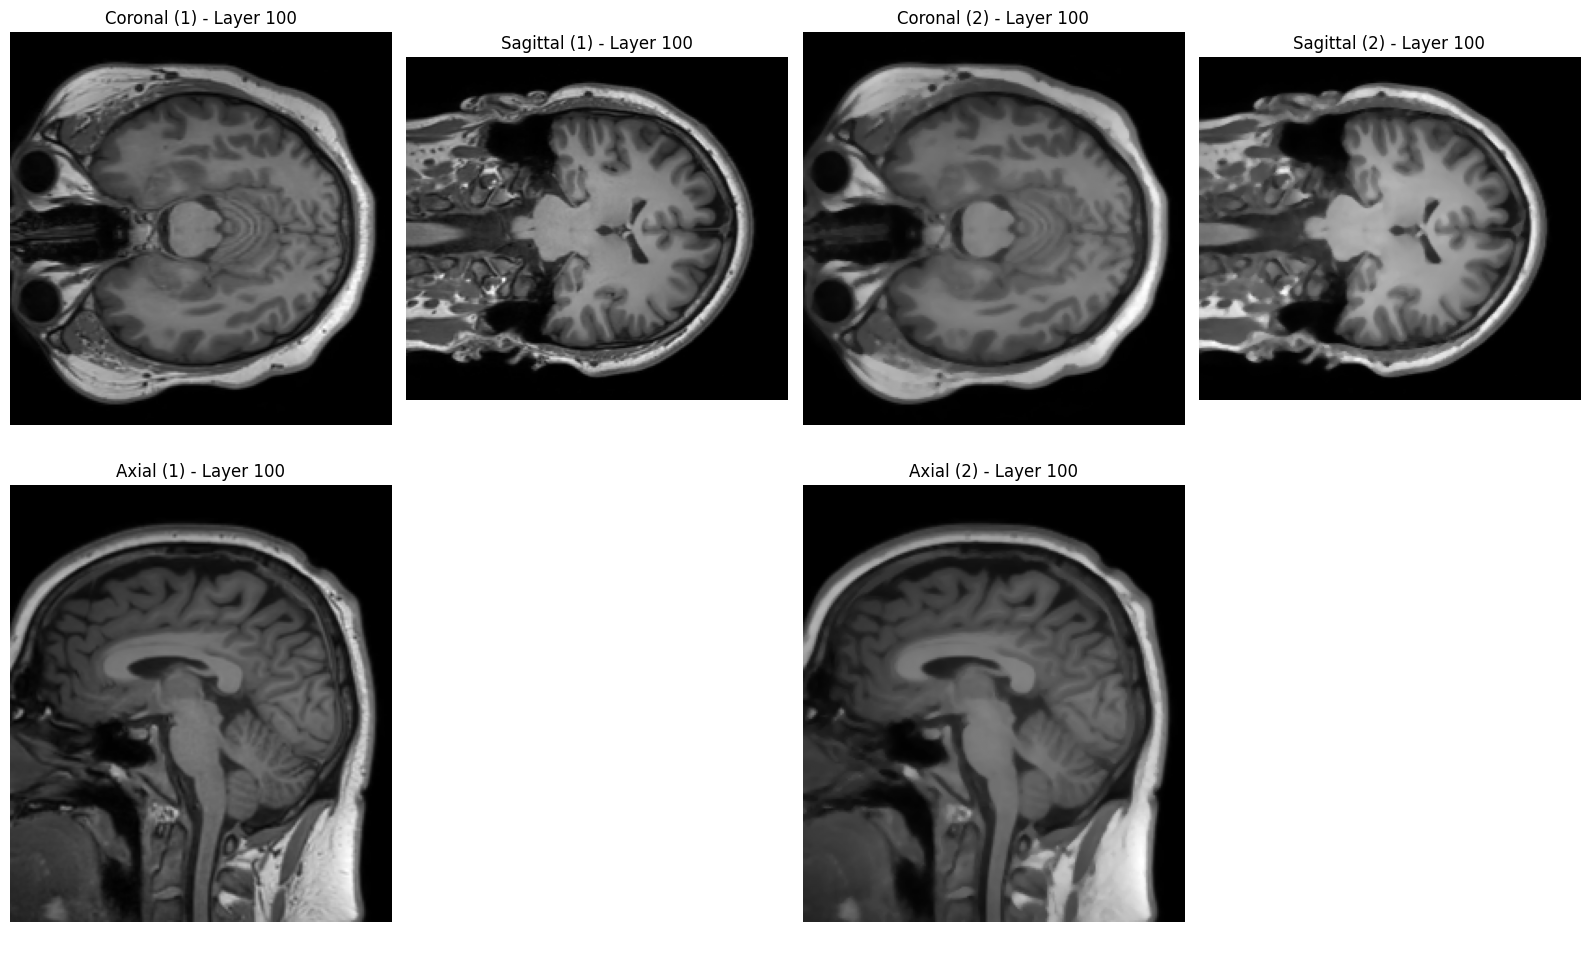

In [8]:
def median_filter_image(image_path, output_path, size=3):
    """
    Load a NIfTI image, apply a median filter, save the filtered image, and display slices of the original and filtered image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the filtered image.
    - size : int, optional
        Size of the median filter. The default value is 1.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the median filter
    filtered_data = ndimage.median_filter(image_data, size=size)
    
    # Create a new NIfTI object with the filtered data
    filtered_img = nib.Nifti1Image(filtered_data, img.affine, img.header)
    
    # Save the filtered image
    nib.save(filtered_img, output_path)
    

# Define the file pathsub-001_ac
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/normalizado.nii.gz')
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/mediana.nii.gz')

# Call the function to filter, save, and visualize the image
median_filter_image(image_path, output_path)
slice_index = 100           # Index of the slice to display
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))



# apply_gaussian_filter

La función `apply_gaussian_filter` permite aplicar un filtro Gaussiano a imágenes en formato NIfTI para suavizar la imagen y reducir el ruido de alta frecuencia. Esta función es ideal para el preprocesamiento de imágenes cerebrales, ya que preserva las estructuras principales mientras elimina variaciones de intensidad no deseadas.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `image_path` | `str` | Ruta al archivo NIfTI original (.nii o .nii.gz) que se desea suavizar |
| `output_path` | `str` | Ruta donde se guardará la imagen suavizada (.nii o .nii.gz) |
| `sigma` | `float`, opcional | Desviación estándar del filtro Gaussiano. Valor por defecto es 0.2 |

## Descripción

La función realiza las siguientes operaciones:

1. **Carga de imagen**: Lee el archivo NIfTI especificado utilizando nibabel
2. **Extracción de datos**: Obtiene los datos de la imagen en formato de array numpy
3. **Aplicación del filtro**: Aplica un filtro Gaussiano usando `scipy.ndimage.gaussian_filter`
4. **Creación de imagen suavizada**: Genera una nueva imagen NIfTI con los datos procesados
5. **Guardado**: Almacena la imagen suavizada en la ruta de salida especificada

## Parámetro sigma - Guía de valores

| Valor de sigma | Efecto | Uso recomendado |
|----------------|--------|-----------------|
| `0.1 - 0.5` | Suavizado ligero | Reducción de ruido mínima, preservación de detalles |
| `0.5 - 1.0` | Suavizado moderado | Preprocesamiento estándar, balance entre suavizado y detalle |
| `1.0 - 2.0` | Suavizado fuerte | Reducción significativa de ruido, puede eliminar detalles finos |
| `> 2.0` | Suavizado muy fuerte | Solo para casos específicos, pérdida considerable de resolución |

## Notas importantes

- **Tipo de filtro**: El filtro Gaussiano es ideal para reducir ruido de alta frecuencia mientras preserva los bordes principales
- **Selección de sigma**: 
  - Valores pequeños (0.1-0.5): Preservan mejor los detalles anatómicos
  - Valores grandes (>1.0): Mayor suavizado pero posible pérdida de información importante
- **Preservación de metadatos**: La función mantiene los metadatos originales de la imagen NIfTI (matriz affine y header)
- **Pipeline de procesamiento**: Típicamente se aplica después del filtro de mediana en el pipeline de preprocesamiento
- **Visualización**: Se recomienda usar `compare_sRMI_images` para evaluar visualmente el efecto del suavizado

## Aplicaciones típicas

- **Preprocesamiento de neuroimágenes**: Reducción de ruido antes de análisis posteriores
- **Preparación para registro**: Suavizado para mejorar la convergencia en algoritmos de registro
- **Análisis estadístico**: Reducción de variabilidad para análisis de grupo
- **Visualización**: Mejora de la calidad visual de las imágenes


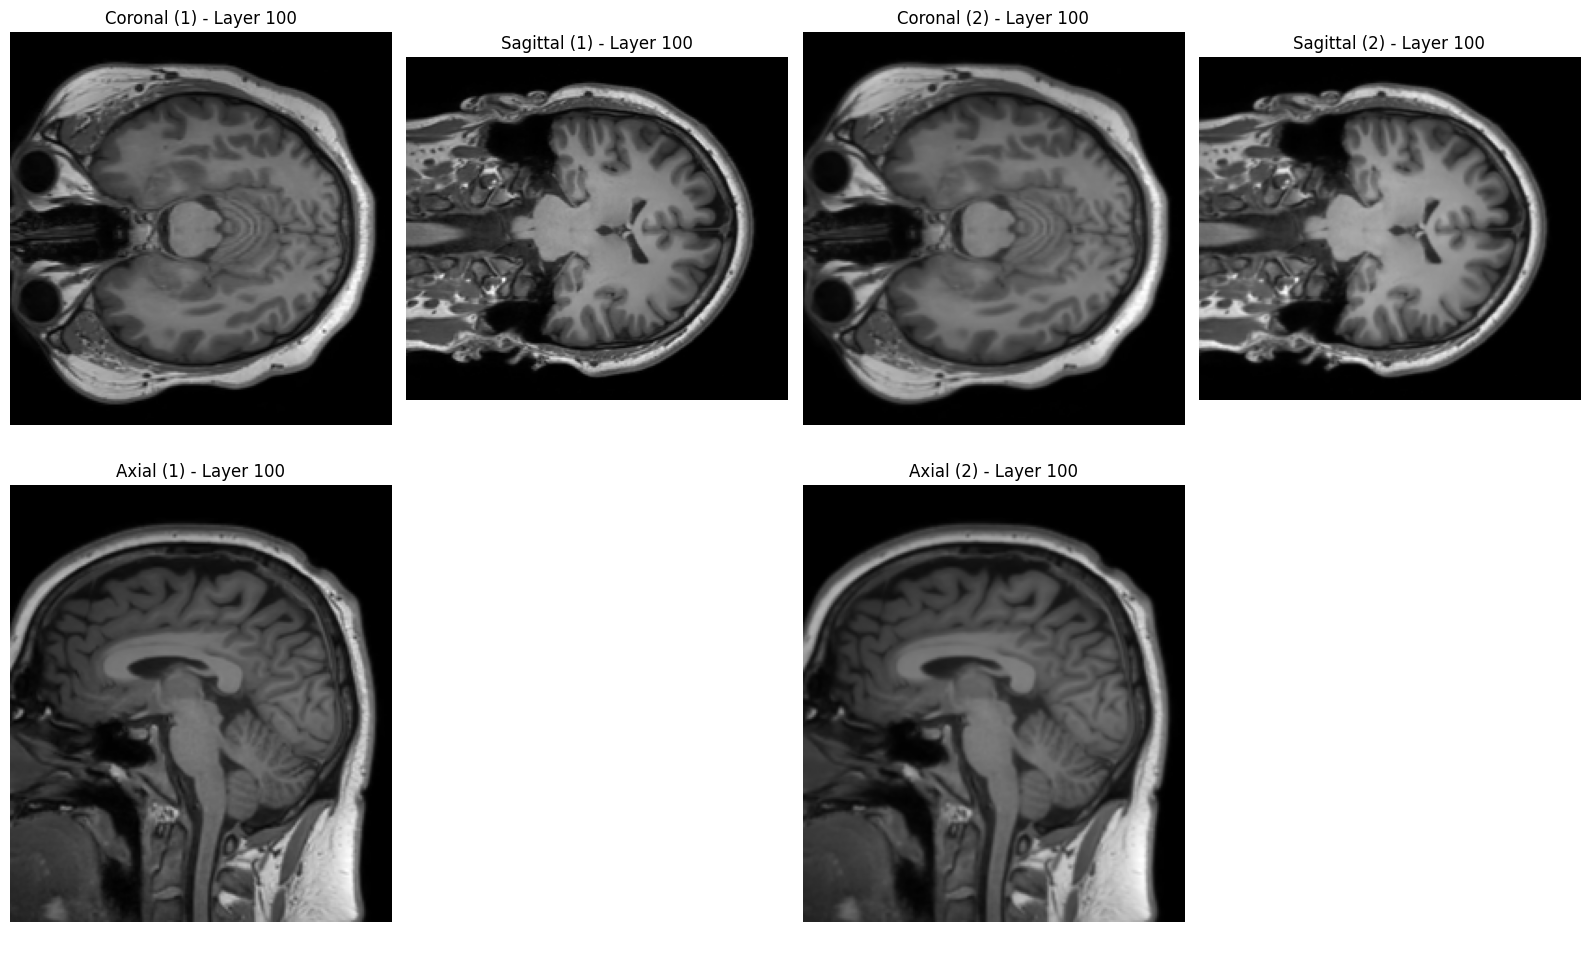

In [12]:
def apply_gaussian_filter(image_path, output_path, sigma=0.5):
    """
    Load a NIfTI image, apply a Gaussian filter, save the smoothed image, and display slices of the original and smoothed image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the smoothed image.
    - sigma : float, optional
        Standard deviation of the Gaussian filter. The default value is 0.1.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the Gaussian filter
    smoothed_data = ndimage.gaussian_filter(image_data, sigma=sigma)
    
    # Create a new NIfTI object with the smoothed data
    smoothed_img = nib.Nifti1Image(smoothed_data, img.affine, img.header)
    
    # Save the smoothed image
    nib.save(smoothed_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/normalizado.nii.gz')
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/gaussiano.nii.gz')

# Call the function to filter, save, and visualize the image
apply_gaussian_filter(image_path, output_path)

# Parameters for visualization
slice_index = 100           # Index of the slice to display
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))




# adaptive_histogram_equalization

La función `adaptive_histogram_equalization` permite aplicar ecualización adaptativa del histograma a imágenes en formato NIfTI para mejorar el contraste local y realzar detalles anatómicos que pueden estar poco visibles. Esta técnica es especialmente útil en neuroimágenes donde diferentes regiones cerebrales pueden tener contrastes variables.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `image_path` | `str` | Ruta al archivo NIfTI original (.nii o .nii.gz) que se desea procesar |
| `output_path` | `str` | Ruta donde se guardará la imagen con contraste mejorado (.nii o .nii.gz) |
| `clip_limit` | `float`, opcional | Límite de recorte para la ecualización adaptativa. Valor por defecto es 0.01 |

## Parámetro clip_limit - Guía de valores

| Valor de clip_limit | Efecto | Uso recomendado |
|---------------------|--------|-----------------|
| `0.001 - 0.01` | Mejora de contraste conservadora | Realce sutil, preservación de características naturales |
| `0.01 - 0.05` | Mejora de contraste moderada | Balance entre realce y naturalidad de la imagen |
| `0.05 - 0.1` | Mejora de contraste agresiva | Realce fuerte, puede introducir artefactos |
| `> 0.1` | Mejora muy agresiva | Solo para casos específicos, riesgo de sobre-procesamiento |

## Principio de funcionamiento

La **ecualización adaptativa del histograma (CLAHE - Contrast Limited Adaptive Histogram Equalization)** mejora el contraste local dividiendo la imagen en regiones pequeñas y aplicando ecualización del histograma de forma independiente a cada región. El parámetro `clip_limit` controla la amplificación máxima del contraste para evitar la sobre-amplificación del ruido.

## Ventajas de la técnica

- **Mejora del contraste local**: Realza detalles en regiones con poco contraste
- **Preservación de información**: Mantiene las características globales de la imagen
- **Control de ruido**: El límite de recorte previene la amplificación excesiva del ruido
- **Adaptabilidad**: Se ajusta automáticamente a las características locales de cada región

## Notas importantes

- **Orden en el pipeline**: Típicamente se aplica después del suavizado con filtro Gaussiano
- **Preservación de metadatos**: La función mantiene los metadatos originales de la imagen NIfTI
- **Interpretación cuantitativa**: Puede afectar los valores de intensidad originales, considerar esto para análisis cuantitativos
- **Visualización**: Se recomienda usar `compare_sRMI_images` para evaluar el efecto del realce de contraste
- **Normalización previa**: Funciona mejor cuando la imagen ha sido previamente normalizada

## Aplicaciones típicas

- **Mejora de visualización**: Realce de estructuras anatómicas poco visibles
- **Preprocesamiento para segmentación**: Mejora la diferenciación entre tejidos
- **Análisis de patología**: Realce de lesiones o anomalías sutiles
- **Preparación para registro**: Mejora de características para algoritmos de alineación
- **Investigación clínica**: Estandarización del contraste entre diferentes adquisiciones
- **Interpretación diagnóstica**: El realce de contraste puede hacer más evidentes detalles que estaban presentes pero poco visibles
- **Consistencia entre sujetos**: Ayuda a estandarizar la apariencia visual entre diferentes imágenes
- **Detección de artefactos**: Puede hacer más evidentes artefactos de adquisición

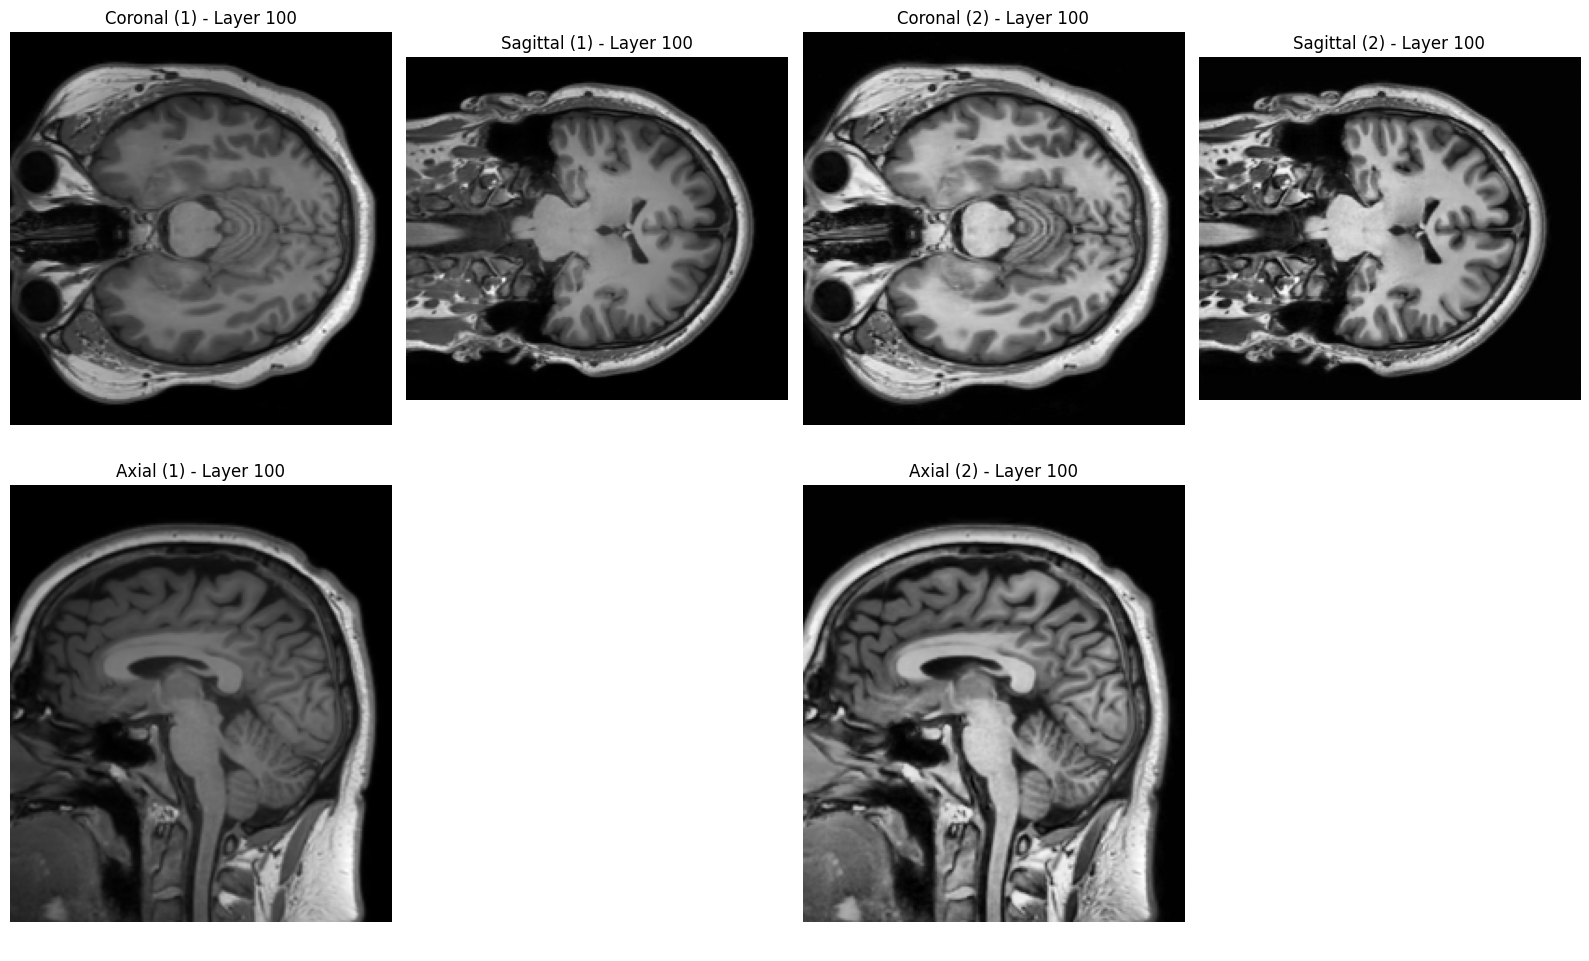

In [18]:
def adaptive_histogram_equalization(image_path, output_path, clip_limit=0.01):
    """
    Load a NIfTI image, apply adaptive histogram equalization, save the contrast-enhanced image, and display slices of the original and enhanced image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the contrast-enhanced image.
    - clip_limit : float, optional
        Clip limit for the adaptive equalization. The default value is 2.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply adaptive histogram equalization
    enhanced_data = exposure.equalize_adapthist(image_data, clip_limit=clip_limit)
    
    # Create a new NIfTI object with the enhanced contrast data
    enhanced_img = nib.Nifti1Image(enhanced_data, img.affine, img.header)
    
    # Save the contrast-enhanced image
    nib.save(enhanced_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/normalizado.nii.gz')  
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/equalizacion.nii.gz') 

# Call the function to apply adaptive histogram equalization, save, and visualize the image
adaptive_histogram_equalization(image_path, output_path)
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))



# enhance_edges

La función `enhance_edges` permite realzar los bordes y contornos anatómicos en imágenes NIfTI utilizando el filtro de Sobel. Esta técnica mejora la definición de las estructuras cerebrales agregando información de gradiente a la imagen original, lo que resulta especialmente útil para destacar límites entre diferentes tejidos y estructuras anatómicas.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `image_path` | `str` | Ruta al archivo NIfTI original (.nii o .nii.gz) que se desea procesar |
| `output_path` | `str` | Ruta donde se guardará la imagen con bordes realzados (.nii o .nii.gz) |
| `weight` | `float`, opcional | Peso para el realce de bordes. Valor por defecto es 0.5 |

## Descripción

La función realiza las siguientes operaciones:

1. **Carga de imagen**: Lee el archivo NIfTI especificado utilizando nibabel
2. **Extracción de datos**: Obtiene los datos de la imagen en formato de array numpy
3. **Detección de bordes**: Aplica el filtro de Sobel usando `skimage.filters.sobel`
4. **Combinación ponderada**: Suma la imagen original con los bordes detectados según el peso especificado
5. **Creación de imagen realzada**: Genera una nueva imagen NIfTI con los bordes mejorados
6. **Guardado**: Almacena la imagen procesada en la ruta de salida especificada

## Principio del filtro de Sobel

El **filtro de Sobel** es un operador de detección de bordes que calcula el gradiente de intensidad en cada punto de la imagen:

- **Detección direccional**: Identifica cambios abruptos de intensidad en todas las direcciones
- **Robustez al ruido**: Incorpora un elemento de suavizado que reduce la sensibilidad al ruido
- **Preservación de información**: Mantiene tanto la magnitud como la dirección del gradiente


## Parámetro weight - Guía de valores

| Valor de weight | Efecto | Uso recomendado |
|-----------------|--------|-----------------|
| `0.1 - 0.3` | Realce sutil | Mejora ligera de bordes, preservación de naturalidad |
| `0.3 - 0.7` | Realce moderado | Balance entre definición y preservación de la imagen |
| `0.7 - 1.0` | Realce fuerte | Bordes muy definidos, puede introducir artefactos |
| `> 1.0` | Realce extremo | Solo para casos específicos, riesgo de sobre-procesamiento |

## Ventajas de la técnica

- **Mejora de definición**: Hace más evidentes los límites entre estructuras anatómicas
- **Preservación de información**: Mantiene toda la información original de la imagen
- **Control ajustable**: El parámetro weight permite controlar la intensidad del realce
- **Compatibilidad**: No altera significativamente los valores de intensidad base
- **Robustez**: El filtro de Sobel es resistente al ruido moderado

## Notas importantes

- **Paso final recomendado**: Se aplica después de todos los filtros de suavizado
- **Preservación de metadatos**: La función mantiene los metadatos originales de la imagen NIfTI
- **Aumento de rango dinámico**: Puede incrementar ligeramente el rango de valores
- **Interpretación cuantitativa**: Considerar el impacto en análisis que dependan de valores absolutos

## Aplicaciones típicas

- **Segmentación de tejidos**: Mejora la precisión en algoritmos de segmentación automática
- **Análisis morfométrico**: Facilita la identificación de límites anatómicos
- **Preparación para registro**: Mejora las características para algoritmos de alineación
- **Visualización clínica**: Realza estructuras para interpretación visual
- **Detección de lesiones**: Mejora la visibilidad de bordes de lesiones
- **Análisis de conectividad**: Facilita el trazado de tractos de sustancia blanca
- **Efecto en el ruido**: Puede amplificar ligeramente el ruido de alta frecuencia
- **Preservación de suavizado**: Aplicar después de filtros de suavizado para mejores resultados
- **Escalabilidad**: El efecto es proporcional al contraste local existente
- **Dirección de bordes**: Detecta bordes en todas las orientaciones espaciales



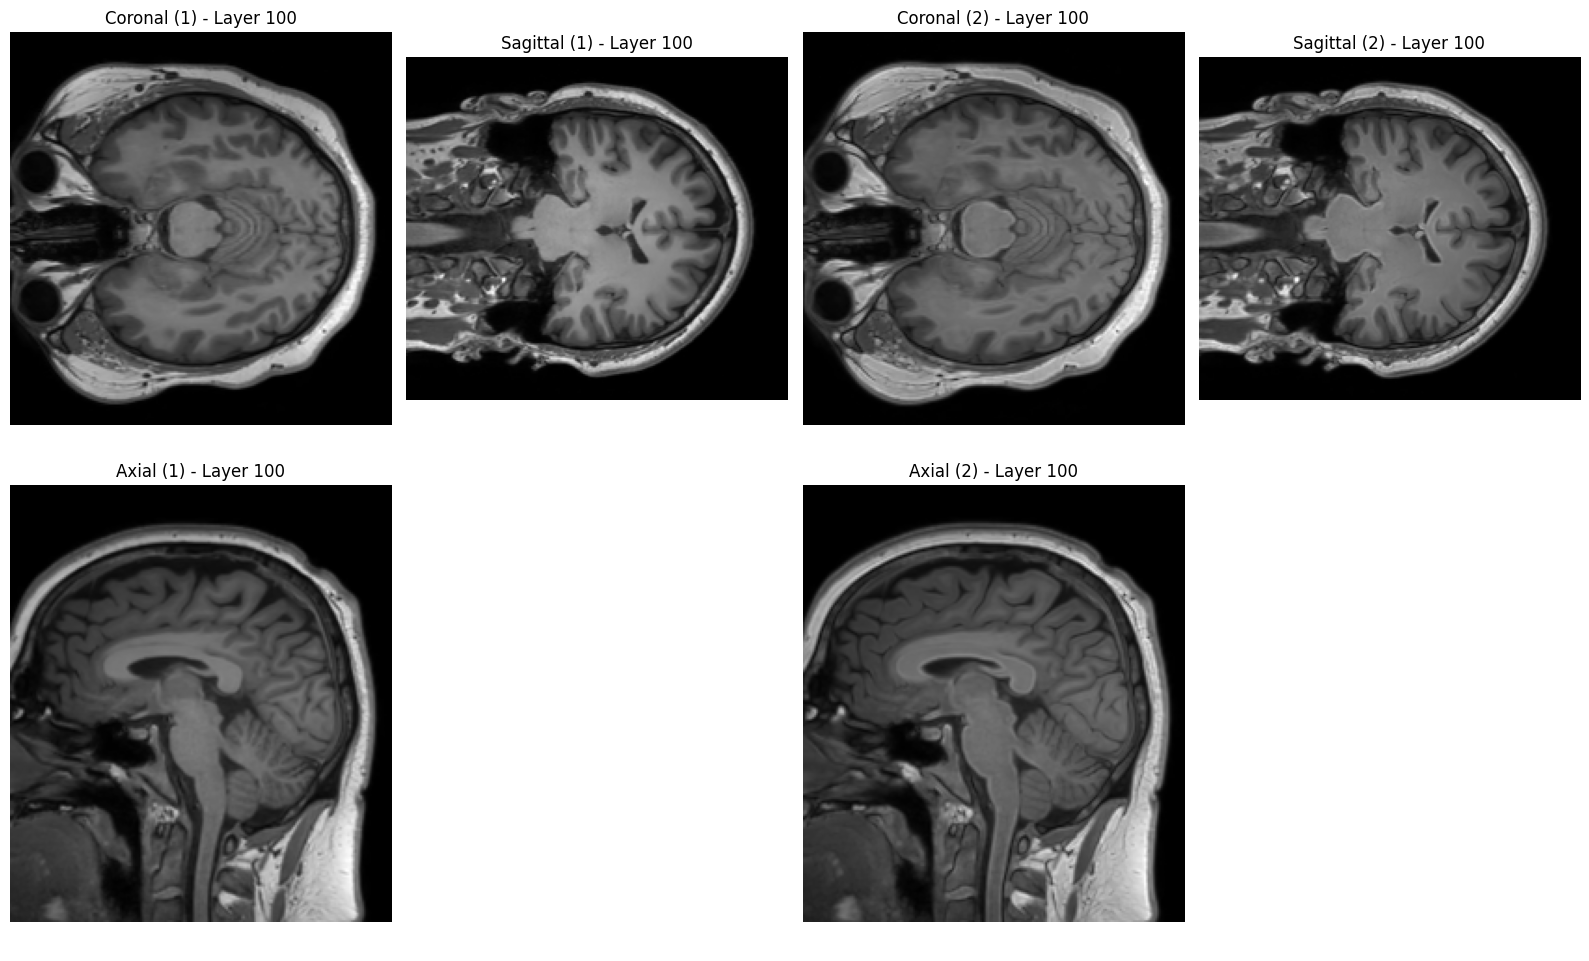

In [22]:
def enhance_edges(image_path, output_path, weight=1):
    """
    Load a NIfTI image, enhance the edges using the Sobel filter, save the image with enhanced edges, and display slices of the original and enhanced image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the image with enhanced edges.
    - weight : float, optional
        Weight to add to the edge enhancement. The default value is 0.2.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the Sobel filter to enhance the edges
    edges = filters.sobel(image_data)
    enhanced_data = image_data + weight * edges
    
    # Create a new NIfTI object with the enhanced edges
    enhanced_img = nib.Nifti1Image(enhanced_data, img.affine, img.header)
    
    # Save the image with enhanced edges
    nib.save(enhanced_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/normalizado.nii.gz')  
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/filter_testing/bordes.nii.gz') 

# Call the function to apply enhance_edges, save, and visualize the image
enhance_edges(image_path, output_path)
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))



In [ ]:
def process_bids_folder(bids_root, output_root):
    """
    Procesa todas las imágenes NIfTI en una estructura BIDS y guarda los resultados en una estructura paralela en output_root.
    Además, copia los archivos de configuración (no NIfTI) manteniendo la estructura.
    """
    for root, dirs, files in os.walk(bids_root):
        for file in files:
            input_path = os.path.join(root, file)
            rel_path = os.path.relpath(input_path, bids_root)
            output_path = os.path.join(output_root, rel_path)
            output_dir = os.path.dirname(output_path)
            os.makedirs(output_dir, exist_ok=True)
            if file.endswith('.nii') or file.endswith('.nii.gz'):
                print(f"Procesando: {input_path} -> {output_path}")
                tmp_path = output_path.replace('.nii', '_tmp.nii').replace('.gz', '')
                normalize_image(input_path, tmp_path)
                median_filter_image(tmp_path, tmp_path)
                apply_gaussian_filter(tmp_path, tmp_path)
                adaptive_histogram_equalization(tmp_path, tmp_path)
                enhance_edges(tmp_path, output_path)
                if os.path.exists(tmp_path) and tmp_path != output_path:
                    os.remove(tmp_path)
            else:
                # Copia archivos de configuración y otros archivos no NIfTI
                shutil.copy2(input_path, output_path)
                print(f"Copiado archivo de configuración: {input_path} -> {output_path}")

# Uso:
bids_root = '/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids'
output_root = '/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids_filtred'
process_bids_folder(bids_root, output_root)

Copiado archivo de configuración: /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids/README -> /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids_filtred/README
Copiado archivo de configuración: /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids/participants.json -> /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids_filtred/participants.json
Copiado archivo de configuración: /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids/dataset_description.json -> /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids_filtred/dataset_description.json
Copiado archivo de configuración: /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids/participants.tsv -> /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point2/data/bids_filtred/participants.tsv
Copiado archivo de configuración: /home/jp/Repositorio